# Imports
`from ooijh import CTD`

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

from ooijh import CTD

## Define Reference Designators And Instantiate Data Class

Goal: Obtain CTD data from the 7m package (RID) on the Oregon Shelf Mooring (CE02SHSM) for the year of 2019.

In [2]:
%%time
site = 'CE02SHSM'
node = 'RID'
bdt = datetime(2019,1,1) # Beginning datetime.
edt = datetime(2019,12,31,23,59,59) # Ending datetime.

# Instantiate CTD specific data processor.
ctd = CTD(site, node, begin_datetime = bdt, end_datetime = edt)

CPU times: user 71.6 ms, sys: 34.5 ms, total: 106 ms
Wall time: 212 ms


## Verify Files

The `CTD` class inherents all of the `KDATA` attributes and functions found within the `core.py` module.
At instance, any files related to the inputs are obtained and can be viewed with `CTD().files`. Inputs can be tuned if multiple datasets (streams) are returned, which may conflict when combining data later.

Below you may notice that not all files are the same and may have different methods (e.g. recovered_host, recovered_inst, telemetered).
`ooijh` will combine these files and will drop duplicates to obtain the most complete time-series.

In [3]:
ctd.files

['/home/jovyan/ooi/kdata/CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered/deployment0008_CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered_20180922T231507.562000-20190421T143038.050000.nc',
 '/home/jovyan/ooi/kdata/CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered/deployment0009_CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered_20190420T003008.443000-20191022T134504.914000.nc',
 '/home/jovyan/ooi/kdata/CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered/deployment0010_CE02SHSM-RID27-03-CTDBPC000-recovered_host-ctdbp_cdef_dcl_instrument_recovered_20191020T171502.171000-20191122T204500.220000.nc',
 '/home/jovyan/ooi/kdata/CE02SHSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/deployment0008_CE02SHSM-RID27-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered_20180922T231501-20190421T143001.nc',
 '/home/jovyan/ooi/kdata/C

# Import Data

Each instrument class will have a `preprocess`, `process`, and `get_data` function.
The preprocess function accept a list of datasets, where each dataset was obtained from a file. Actions that need to be performed on each dataset before they are combined should be placed in the `preprocess` function. The `process` function hosts actions that can be performed after the datasets are combined. Both the `preprocess` and `process` functions will rarely be called by an end user. The `get_data` function is a wrapper for both these functions and exposes preprocessed, combined, and processed dataset to the end user.

In [4]:
ctdds = ctd.get_data()

In [5]:
ctdds

<xarray.Dataset>
Dimensions:                             (time: 62056)
Coordinates:
    depth                               (time) float64 7.246 7.243 ... 7.043
  * time                                (time) datetime64[ns] 2019-01-01T00:0...
Data variables:
    deployment                          (time) int32 8 8 8 8 8 ... 10 10 10 10
    latitude                            (time) float64 44.64 44.64 ... 44.64
    longitude                           (time) float64 -124.3 -124.3 ... -124.3
    sea_water_absolute_salinity         (time) float64 32.74 32.74 ... 32.52
    sea_water_conservative_temperature  (time) float64 11.42 11.42 ... 10.21
    sea_water_density                   (time) float64 1.025e+03 ... 1.025e+03
    sea_water_electrical_conductivity   (time) float64 3.695 3.695 ... 3.566
    sea_water_practical_salinity        (time) float64 32.58 32.58 ... 32.37
    sea_water_pressure                  (time) float64 7.305 7.302 ... 7.101
    sea_water_temperature               (time) float64 11.38 11.38 ... 10.17

# Plot Data

In the plots below, you may observe data points that are suspect or questionable. By default, importing data using `ooijh` will
NaN data based on the primary QARTOD flag for that variable if it is flagged as bad (flag = 4) or missing (flag = 9).

(17897.0, 18261.999988425927)

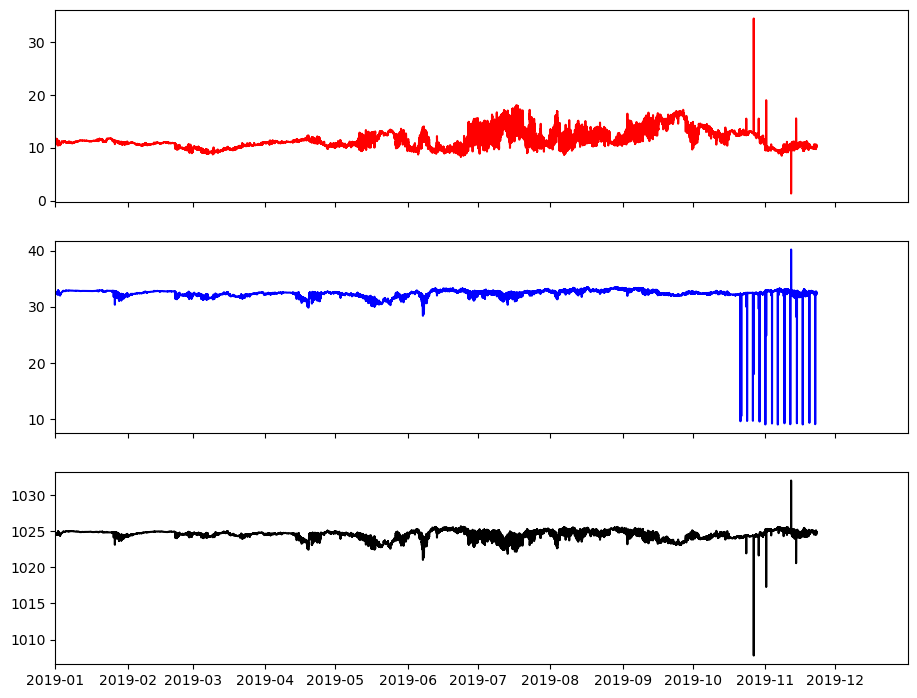

In [6]:
fig, ax = plt.subplots(3,1,figsize = (11,8.5), sharex = True)

ax[0].plot(ctdds.time, ctdds.sea_water_conservative_temperature, color = 'red')
ax[1].plot(ctdds.time, ctdds.sea_water_absolute_salinity, color = 'blue')
ax[2].plot(ctdds.time, ctdds.sea_water_density, color = 'black')
ax[-1].set_xlim(bdt, edt)

## Changing QARTOD Flag Inputs
You may observe at the end of the time-series that values are questionable. We can NaN data flagged as suspect/questionable (flag = 3) by supplying it in the nan_flags input of each sensor class. 

In [7]:
nan_flags = [3,4,9]
ctd = CTD(site, node, begin_datetime = bdt, end_datetime = edt, nan_flags = nan_flags) #Reinstance
ctdds = ctd.get_data() #Obtain data again.

(17897.0, 18261.999988425927)

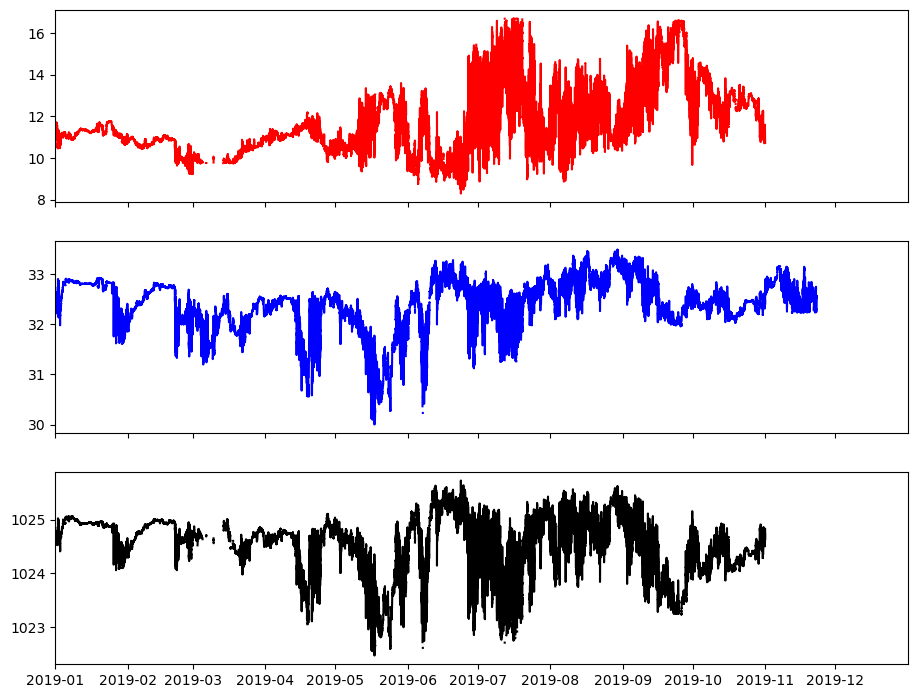

In [8]:
fig, ax = plt.subplots(3,1,figsize = (11,8.5), sharex = True)

ax[0].plot(ctdds.time, ctdds.sea_water_conservative_temperature, color = 'red')
ax[1].plot(ctdds.time, ctdds.sea_water_absolute_salinity, color = 'blue')
ax[2].plot(ctdds.time, ctdds.sea_water_density, color = 'black')
ax[-1].set_xlim(bdt, edt)

# Cross Shelf 7M Data

In [9]:
sites = ['CE01ISSM', 'CE02SHSM', 'CE04OSSM']
node = 'RID'
bdt = datetime(2019, 1,1)
edt = datetime(2019,12,31,23,59,59)

ds_list = []
for site in sites:
    ctd = CTD(site, node, begin_datetime = bdt, end_datetime = edt, nan_flags = [3,4,9])
    ds_list.append(ctd.get_data())
ce01ds, ce02ds, ce04ds = ds_list

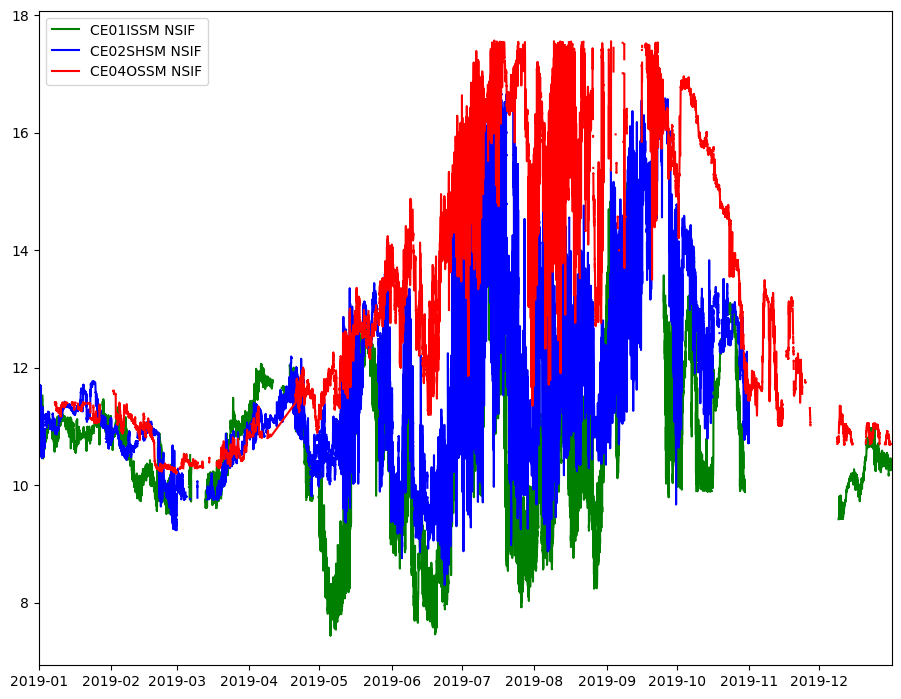

In [10]:
fig, ax = plt.subplots(1,1, figsize = (11,8.5))

ax.plot(ce01ds.time, ce01ds.sea_water_conservative_temperature, color = 'green', label = 'CE01ISSM NSIF')
ax.plot(ce02ds.time, ce02ds.sea_water_conservative_temperature, color = 'blue', label = 'CE02SHSM NSIF')
ax.plot(ce04ds.time, ce04ds.sea_water_conservative_temperature, color = 'red', label = 'CE04OSSM NSIF')
ax.set_xlim(bdt, edt)
ax.legend(loc = 'upper left')